# **転換契約における数理モデルの試作**

## 前置き

本稿は、以下の問題意識をもとに、文章、Pythonコードとも、すべて生成AI（Microsoft Copilot Chat）に生成させてたものである。
ただし、文章でいくつか意味的な補足が必要な部分は追記などを行っている箇所はある。

## Introduction

大学、大学図書館が直面する学術情報流通の構造は、近年大きな転換点を迎えている。  
購読費の継続的な上昇、研究者 APC（Article Processing Charge）の増大、そして世界的な OA（Open Access）政策の加速により、大学は従来の購読中心のモデルから、より持続可能で透明性の高い研究費構造への移行を迫られている。

特に、急速に普及した **転換契約（Transformative Agreement; TA）** は、購読費と APC を統合し、大学が出版社と包括的に契約することで OA 出版を促進する仕組みとして注目されている。しかし、TA の効果は単純な「購読費から APC への置換」にとどまらず、研究費の配分構造そのものに影響を与える可能性がある。

本研究の出発点は、次の問いである。

> **転換契約は、大学の研究費構造をどのように変化させ、研究活動や論文アクセスにどのような影響を与えるのか。**

この問いに答えるためには、購読費・APC・転換契約費がどのように相互作用し、  
研究費の実質的な利用可能額（特に非APC研究費）がどのように変化するかを、  
動学的かつ分野別に評価する必要がある。

既存研究では、購読費の高騰（いわゆる「ビッグディール問題」）や APC の増加が研究費を圧迫することが指摘されてきたが、  
**TA が研究費の効率性を高め、研究活性化をもたらす可能性**については十分に定量化されていない。  
また、分野ごとの研究力（出版数）や研究費構造の違いを踏まえた分析も不足している。

そこで本研究では、以下の 3 点を統合した新しい数理モデル **df_v7** を構築する。

1. **分野別固定予算のもとでの APC・TTA・購読費の完全分解**  
2. **研究力（出版数）に応じて転換契約の効用が変化する APC 置換モデル**  
3. **研究活性化と論文アクセス量を同時に評価する動学モデル**

特に df_v7 では、転換契約費の効用を表すパラメータ $$(\beta_{t,f})$$ を  
分野の研究力（本稿では、出版数で代替的に表現されるものとする。）に応じて動的に変化させることで、

- 研究力の高い分野ほど転換契約の効果が大きく現れる  
- APC がより強く削減され、非APC研究費が増加する  
- 研究活性化 \(Y_{t,f}\) が上昇する  
- 出版社コストの成長率が抑制される  

という構造を明示的にモデル化した。

さらに、購読アクセスの飽和型関数と OA 化率のロジスティック成長を組み合わせることで、  
**アクセス量（OA + 購読）と研究活性化の双方を評価する総合効用**を定義し、  
大学が直面する政策的トレードオフを定量的に分析する。

本研究の目的は、TA が大学の研究費構造に与える影響を動学的に評価し、  
**持続可能な学術情報流通モデルの設計に向けた理論的基盤を提供すること**である。

## 📘 **研究目的（Research Objectives）**

本稿の目的は、大学が直面する学術情報流通の構造的課題に対し、  
**転換契約（Transformative Agreement; TA）が研究費構造・研究活性化・アクセス量に与える影響を動学的に評価すること**である。

具体的には、以下の 3 点を主要な研究目的として設定する。

### **1. APC・TTA・購読費の分野別動学構造の定量化**

分野別固定予算のもとで、

- 研究者自身が支払うAPC  
- 転換契約費（TTA）  
- 購読費（S）  

がどのように相互作用し、出版社コスト 
$$
(C_{t,f})
$$
がどのように推移するかを定量的に評価する(tは時間、fは分野)。
なお、本稿では分野を便宜的に、医学系、理工系、人文社会系の3分野としている。

特に、TTA の増加が APC をどの程度置換し、購読費をどれだけ削減するかを明らかにする。

---

### **2. 研究力（出版数）に応じた転換契約の効用の評価**

df_v7 では、転換契約の効用（APC 置換効率）を

- 分野の研究力（出版数）  
- 分野固有の基礎効率  

に応じて動的に変化させる。

これにより、

- 研究力の高い分野ほど TTA の効果が大きい  
- 同じ投資でも APC の削減量が異なる  

という現実的な構造をモデル化し、その影響を定量的に評価する。

---

### **3. アクセス量と研究活性化を統合した総合効用の評価**

OA 化率のロジスティック成長と購読アクセスの飽和型関数を組み合わせ、

- 総アクセス量 $$(Q^{\text{read}}_t)$$  
- 研究活性化 $$(Y_t)$$  

を統合した総合効用

$$
U_t = w_1 Q^{\text{read}}_t + w_2 Y_t
$$

を定義する。

これにより、大学が直面する

- 「短期的なアクセス確保」  
- 「中長期的な研究活性化」  

という政策目的のトレードオフを定量的に評価する。

---

## 📘 **貢献（Contributions）**

本研究の貢献は、以下の 4 点に整理される。

### **1. APC・TTA・購読費の完全分解による研究費構造の可視化**

従来の研究では、購読費と APC の関係は部分的にしか扱われてこなかった。  
本稿では、分野別に予算が固定されているという仮定のもとで

- APC  
- TTA  
- 購読費  
- 非APC研究費  

を完全に分解し、出版社コスト $$(C_{t,f})$$ を明示的に定義した。

---

### **2. 研究力依存の APC 置換効率（β）の導入**

df_v7 では、転換契約の効用を

$$
\beta_{t,f}
= \beta_f^{(0)}\left(1 + \phi \cdot \frac{P_{t,f}}{\bar P_f}\right)
$$

と定義し、研究力（出版数）が高い分野ほど TTA の効果が大きくなる構造を導入した。

これは、実際の TA が「研究力の高い分野でより効果的に機能する」という経験的知見を数理モデルとして体系化した。

---

### **3. アクセス量と研究活性化を統合した総合効用の提案**

OA 化率の動学と購読アクセスの飽和型関数（一定の限界値を超えると出力が一定（飽和）になる）を組み合わせ、  
アクセス量と研究活性化を統合した総合効用 $$(U_t)$$ を定義した。

これにより、大学が直面する

- アクセス確保  
- 研究活性化  
- 研究費効率化  

という複数の政策目的を同時に評価できる枠組みを提供した。

---

### **4. Python による動学シミュレーションの実装**

df_v7 の動学方程式を Python で実装し、  
分野別の

- APC  
- TTA  
- 購読費  
- 出版社コスト  
- 研究活性化  
- アクセス量  

の推移を可視化した。

これにより、政策シナリオ（TTA の強弱、研究力の違いなど）を  
定量的に比較可能な分析基盤を提供した。

## 📘 **Methods**

### 研究デザインの概要

本研究では、序論で提示した仮説を検証するために、以下の 3 段階の方法論を採用した。

1. **仮説に基づく数理モデルの構築**  
2. **モデルの形式化（予算恒等式・動学方程式）**  
3. **Python による実装とシミュレーション**

本節ではモデル構築の方法論を述べ、パラメータ値は次節にまとめて示す。

---

### 数理モデル構築の方針

本研究の数理モデル（df_v7）は、以下の設計方針に基づいて構築した。

- 分野別固定予算の採用  
- 予算恒等式の明示化  
- OA 化率のロジスティック成長  
- 転換契約費の動学  
- APC の置換（研究力依存の効用を導入）  
- 購読アクセスの飽和型関数  
- 研究活性化の非線形効果  

---

### 予算恒等式

df_v7 の根幹は、分野別研究予算 $$(B_f)$$ が

$$
B_f = T^{TA}_{t,f} + A_{t,f} + R^{\text{non}}_{t,f} + S_{t,f}
$$

の恒等式として固定されている点にある。
つまり、** 分野別研究予算は、転換契約費・研究者が支払うAPC・非APC研究費・大学としての購読費の合計であり、分野別研究予算全体は一定**、と仮定した。

購読費は残差として決まる、とも言える：

$$
S_{t,f}
= B_f - T^{TA}_{t,f} - A_{t,f} - R^{\text{non}}_{t,f}.
$$

---

### 主要な動学方程式

#### 世界論文数の成長

$$
P_{t,f} = P_{t-1,f}(1+\rho_f).
$$

#### OA 化率（初期値補正付きロジスティック）

$$
g_{t,f}
= \mathrm{Rescale}\left(
\frac{g_{\infty,f}}{1+\exp\{-\gamma_f(t-t_{0,f})\}}
\right).
$$

---

### 転換契約費（投資比率による表現）

転換契約費は分野別予算に対する投資比率

$$
u_{t,f} = \frac{T^{TA}_{t,f}}{B_f}
$$

として表す。

本稿では、$$(u_{t,f})$$ は初期値 $(u^{\min}_f)$ から $(T_0)$ 年間で線形に  
$(u^{\max}_f)$
まで増加し、その後は一定とする：

$$
u_{t,f}
= u^{\min}_f + (t-1)\Delta u_f
\quad (t \le T_0),
$$

$$
u_{t,f} = u^{\max}_f
\quad (t > T_0),
$$

$$
\Delta u_f = \frac{u^{\max}_f - u^{\min}_f}{T_0 - 1}.
$$

---

### 研究力依存の APC 置換効率

転換契約費が APC を削減する効率は、分野の研究力（論文出版数）に依存すると仮定する。

基礎効率 $$(\beta_f^{(0)})$$ に対し、研究力依存の効用増幅を

$$
\beta_{t,f}
= \beta_f^{(0)}\left(1 + \phi \cdot \frac{P_{t,f}}{\bar P_f}\right)
$$

と定義する。

研究者 APC は

$$
A_{t,f}
= \max(0, A^{\text{base}}_f - \beta_{t,f} T^{TA}_{t,f})
$$

で与えられる。

研究力が高い分野ほど $$(\beta_{t,f})$$ が大きくなり、同じ転換契約費でより多くの APC を置換できる。

---

### 購読費と出版社コスト

購読費は予算恒等式より

$$
S_{t,f}
= B_f - T^{TA}_{t,f} - A_{t,f} - R^{\text{non}}_{t,f}.
$$

出版社コストは

$$
C_{t,f}
= A_{t,f} + T^{TA}_{t,f} + S_{t,f}.
$$

---

### 研究活性化

非APC研究費 $$(R^{\text{non}}_{t,f})$$ は研究活性化に寄与し、

$$
Y_{t,f}
= \eta_f (R^{\text{non}}_{t,f})^{\gamma_R} N_f^{0.2}
$$

と定式化する。

総研究活性化は

$$
Y_t = \sum_f Y_{t,f}.
$$

---

### 購読アクセス（飽和型関数）

$$
Q^{\text{sub}}_{t,f}
= P_{t,f}\left(1 - e^{-\kappa_f S_{t,f}/P_{t,f}}\right).
$$

---

### 総アクセス量

$$
Q^{\text{read}}_t
= \sum_f \left( P_{t,f} g_{t,f} + Q^{\text{sub}}_{t,f} \right).
$$

---

### 総合効用

$$
U_t = w_1 Q^{\text{read}}_t + w_2 Y_t.
$$

ここで $$(w_1, w_2)$$ はアクセスと研究活性化の相対的重みである。

## 📘 **Discussion（考察）**

本稿では、分野別固定予算のもとで APC・転換契約費（TTA）・購読費（S）を完全に分解し、  
研究力依存の APC 置換効率を導入した動学モデル df_v7 を構築した。  
その結果、転換契約が研究費構造および研究活動に与える影響について、  
いくつかの示唆が得られた。

---

### **1. 転換契約は APC の単なる置換ではなく、研究費構造を再編成する**

df_v7 の結果から、TTA の増加は APC を直接的に削減するだけでなく、  
購読費 S の減少を通じて **研究費の再配分** を引き起こすことが明らかになった。

特に、研究力の高い分野では APC の削減効果が大きく、  
その分だけ非APC研究費 \(R^{\text{non}}_{t,f}\) が増加し、  
研究活性化 \(Y_{t,f}\) が上昇する。

これは、転換契約が「購読費 → APC への単純な置換」ではなく、  
**研究費の効率性を高める政策的手段**として機能し得ることを示している。

---

### **2. 研究力依存の効用 β により、分野差が自然に再現される**

df_v7 では、転換契約の効用を

$$
\beta_{t,f}
= \beta_f^{(0)}\left(1 + \phi \cdot \frac{P_{t,f}}{\bar P_f}\right)
$$

と定義した。  
この研究力依存の効用は、以下のような現実的な分野差を自然に再現する。

- 医学・理工など出版数が多く APC が高い分野では、TTA の効果が大きい  
- 人文社会系では、TTA の効果は限定的だがゼロではない  
- 同じ TTA を投入しても、分野ごとに APC 削減量が異なる  

これは、実際の転換契約においても「研究力の高い分野ほど出版社との交渉力が高く、  
転換契約の効果が大きい」という経験的知見と整合的である。

---

### **3. 出版社コストの成長率は 5 年目以降に飽和する**

df_v7 のシミュレーションでは、TTA を 5 年目まで増加させると、  
出版社に支払っているコスト（出版社コスト） $(C_{t,f})$ の成長率が 5 年目以降に大きく抑制されることが確認された。

これは、転換契約が

- APC の削減  
- 購読費の逓減  
- OA 化率の上昇  

を通じて、出版社コストの長期的な安定化に寄与する可能性を示唆する。

大学にとって、これは **予算の予見可能性の向上** という重要な利点を意味する。

---

### **4. アクセス量と研究活性化のトレードオフ**

df_v7 では、総アクセス量と研究活性化を統合した総合効用

$$
U_t = w_1 Q^{\text{read}}_t + w_2 Y_t
$$

を定義した。

シミュレーションの結果、以下のトレードオフが確認された。

- **短期的にはアクセス量の増加が支配的**  
  （購読費 S がまだ大きく、OA 化率も低いため）

- **中長期的には研究活性化が効いてくる**  
  （APC 削減 → 非APC研究費の増加 → Y の上昇）

これは、大学が転換契約を評価する際に  
**短期のアクセス確保と中長期の研究活性化の両方を考慮する必要がある**  
ことを示している。

---

### **5. モデルの限界と今後の課題**

df_v7 は研究費構造の動学を明示的に扱う点で新規性があるが、  
いくつかの限界も存在する。

1. **出版社側の価格設定行動を内生化していない**  
   - 現在は Big Deal の年率成長を 外因的・外生的 に設定している  
   - 将来的にはゲーム理論的モデル化が必要

2. **研究者行動（投稿先選択）を内生化していない**  
   - APC の変化が投稿行動に影響する可能性がある

3. **分野間の相互作用を考慮していない**  
   - 実際には分野間で予算の競合や代替が起こり得る

4. **最適制御（u の最適化）は本研究では扱わない**  
   - df_v7 の構造を前提に、最適な TTA 投資パスを求めることは今後の課題

これらの課題は、df_v7 を基盤として拡張可能であり、  
本研究の枠組みが将来の理論的発展に向けた基礎となる。

### **5.1 (補論)継続的に購読費を圧縮するための条件**

本研究の結果は、購読費 $(S_{t,f})$ を単純に削減するだけでは、長期的な費用構造の改善にはつながらないことを示している。df_v7 において購読費は

$$
S_{t,f} = B_f - T^{TA}_{t,f} - A_{t,f} - R^{\text{non}}_{t,f}
$$

という恒等式で決まり、他の費目の結果として残余的に決定される。したがって、購読費を継続的に圧縮するには、**購読費そのものを直接削るのではなく、購読費が“残りにくい構造”を形成することが必要である**。

本研究のモデル構造から導かれる、購読費圧縮のための主要な条件は以下の 3 点に整理できる。

---

### **(1) 転換契約費の戦略的な増加と効率化**

TTA の増加は APC の削減を通じて購読費を押し出す効果を持つが、その効果は研究力依存の効用

$$
\beta_{t,f}
= \beta_f^{(0)}\left(1 + \phi \cdot \frac{P_{t,f}}{\bar P_f}\right)
$$

によって大きく左右される。  
特に出版数の多い分野では $(\beta_{t,f})$ が高く、同じ TTA 投資でも APC 削減量が大きくなるため、**研究力の高い分野に重点的に TTA を配分することが購読費圧縮の起点となる**。

---

### **(2) APC 削減を通じた研究費構造の再編成**

APC が削減されると、その分だけ非APC研究費 $(R^{\text{non}}_{t,f})$ が増加し、研究活性化 $(Y_{t,f})$ が高まる。  
研究活性化の上昇は出版数の増加につながり、結果として $(\beta_{t,f})$ をさらに押し上げる。

このフィードバックにより、

- APC 削減  
- 非APC研究費の増加  
- 研究活性化  
- 研究力の強化  
- TTA 効用の増幅  
- 購読費の圧縮

という循環が形成される。  
**購読費圧縮は、研究力強化と APC 削減を介した構造的な結果として生じる**。

---

### **(3) 非APC研究費の最低確保ルールの導入**

購読費が研究費を侵食し続けることを防ぐためには、非APC研究費に対して一定の下限を設けることも有効である。  
例えば、

$$
\frac{R^{\text{non}}_{t,f}}{B_f} \ge \theta
$$

のような制約を設けることで、購読費が過度に膨張することを抑制できる。  
このようなルールは、研究費構造の持続可能性を担保する政策的手段として位置づけられる。

---

### **小括**

以上より、購読費の継続的な圧縮は、単なる費用削減ではなく、

- TTA の効率的活用  
- APC 削減を通じた研究費構造の再編成  
- 研究力強化による効用増幅  
- 非APC研究費の最低確保  

といった複数の要素が相互に作用することで実現される。  
df_v7 は、このような構造的変化を動学的に評価する枠組みを提供しており、購読費圧縮を大学の研究戦略全体の中で位置づける必要性を示唆している。

## 📘 **Conclusion（結論）**

本研究では、分野別固定予算のもとで APC・転換契約費（TTA）・購読費（S）を完全に分解し、研究力依存の APC 置換効率を導入した動学モデル df_v7 を構築した。  
このモデルを用いて、転換契約が大学の研究費構造、研究活性化、論文アクセス量に与える影響を動学的に評価した結果、以下の主要な知見が得られた。

---

### **1. 転換契約は APC の単なる置換ではなく、研究費構造を再編成する**

df_v7 の結果は、TTA の増加が APC を直接削減するだけでなく、購読費の減少を通じて **非APC研究費を増加させる効果**を持つことを示した。  
これにより、研究費の実質的な利用可能額が増え、研究活動の活性化につながる。

---

### **2. 研究力の高い分野ほど転換契約の効果が大きい**

研究力依存の効用  
$$
\beta_{t,f}
= \beta_f^{(0)}\left(1 + \phi \cdot \frac{P_{t,f}}{\bar P_f}\right)
$$  
を導入したことで、出版数の多い分野（医学・理工）では TTA の効果が大きく、  
APC の削減量も大きいことが明確になった。

これは、実際の転換契約が研究力の高い分野でより効果的に機能するという経験的知見と整合的である。

---

### **3. 出版社コストの成長率は中期以降に抑制される**

TTA を 5 年間増加させる政策シナリオでは、出版社コスト $C_{t,f}$ の成長率が  
**5 年目以降に大きく抑制される**ことが確認された。

これは、転換契約が大学にとって **予算の予見可能性を高める**政策的手段となり得ることを示唆する。

---

### **4. アクセス量と研究活性化の双方を改善する可能性**

総アクセス量  
$$
Q^{\text{read}}_t
= \sum_f \left( P_{t,f} g_{t,f} + Q^{\text{sub}}_{t,f} \right)
$$  
と、研究活性化  
$$
Y_t = \sum_f Y_{t,f}
$$  
を統合した総合効用  
$$
U_t = w_1 Q^{\text{read}}_t + w_2 Y_t
$$  
の分析から、転換契約は **短期的なアクセス確保** と **中長期的な研究活性化** の両方に寄与することが示された。

---

### **5. df_v7 は政策評価の基盤として有効である**

df_v7 は、分野別の研究費構造・出版動態・OA 化率・研究活性化を統合的に扱うことで、  
大学が直面する複雑な政策判断（購読費削減、APC 負担軽減、研究活性化）を  
**定量的に評価するための基盤モデル**として機能する。

特に、研究力依存の効用を導入したことで、  
分野差を考慮した現実的な政策評価が可能となった。

---

## **おわりに**

本研究は、転換契約が大学の研究費構造に与える影響を動学的に評価するための  
新しい理論モデルを提示した。  
今後は、出版社側の価格設定行動や研究者の投稿行動を内生化することで、  
より精緻な政策分析へと発展させることが期待される。

# 📘 **df_v7 パラメータ表**

- df_v7 のコードと論文の対応を一覧表とした。

## 1. 分野別予算・研究費関連パラメータ

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $B_f$ | M: 30M, R: 50M, H: 20M | `B[f]` | 分野別固定予算 |
| $R^{\text{total}}_f$ | M: 10M, R: 15M, H: 5M | `R_total[f]` | APC + 非APC研究費 |
| $A^{\text{base}}_f$ | M: 2M, R: 2.5M, H: 0.5M | `A_base[f]` | 基準 APC |

---

## 2. 転換契約（TTA）関連パラメータ

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $u^{\min}_f$ | 0.02 | `u_min` | 初期 TTA 投資比率 |
| $u^{\max}_f$ | 0.10 | `u_max` | 最大 TTA 投資比率 |
| $T_0$ | 5 | `T0` | TTA 増加期間 |
| $u_{t,f}$ | — | `u[f][t]` | 年次 TTA 投資比率 |
| $T^{TA}_{t,f}$ | — | `TTA[f][t]` | 転換契約費 |

---

## 3. APC 置換効率（研究力依存）

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $\beta_f^{(0)}$ | M: 0.20, R: 0.10, H: 0.05 | `beta0[f]` | 基礎 APC 置換効率 |
| $\phi$ | 0.8 | `phi` | 研究力による効用増幅 |
| $\bar P_f$ | 初期出版数 | `P0[f]` | 出版数の基準値 |
| $\beta_{t,f}$ | — | `beta_tf` | 研究力依存の APC 置換効率 |
| $A_{t,f}$ | — | `A[f][t]` | 年次 APC |

---

## 4. 出版動態・OA 化率関連パラメータ

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $\rho_f$ | 0.03 | `rho[f]` | 世界論文数の成長率 |
| $P_{t,f}$ | — | `P[f][t]` | 年次出版数 |
| $g_{\infty,f}$ | 0.9 | `g_inf[f]` | OA 化率の上限 |
| $\gamma_f$ | 0.4 | `gamma[f]` | OA 化の成長速度 |
| $t_{0,f}$ | 10 | `t0[f]` | OA 化の転換点 |
| $g_{t,f}$ | — | `g[f][t]` | 年次 OA 化率 |

---

## 5. 研究活性化関連パラメータ  
（査読付き論文の発行度合を代理指標として使用）

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $\eta_f$ | 1.0 | `eta[f]` | 研究活性化のスケール係数 |
| $\gamma_R$ | 0.5 | `gamma_R` | 限界効用逓減 |
| $N_f$ | M: 300, R: 500, H: 200 | `N[f]` | 分野別研究者数 |
| $R^{\text{non}}_{t,f}$ | — | `R_non[f][t]` | 非APC研究費 |
| $Y_{t,f}$ | — | `Y[f][t]` | 研究活性化（査読論文生産の代理） |

研究活性化の式：

$$
Y_{t,f}
= \eta_f (R^{\text{non}}_{t,f})^{\gamma_R} N_f^{0.2}
$$

---

## 6. アクセス関連パラメータ

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $\kappa_f$ | 0.5 | `kappa[f]` | 購読アクセスの飽和速度 |
| $Q^{\text{sub}}_{t,f}$ | — | `Q_sub[f][t]` | 購読アクセス量 |
| $Q^{\text{read}}_t$ | — | `Q_read[t]` | 総アクセス量 |

購読アクセスの式：

$$
Q^{\text{sub}}_{t,f}
= P_{t,f}\left(1 - e^{-\kappa_f S_{t,f}/P_{t,f}}\right)
$$

---

## 7. 総合効用関連パラメータ

| 数式パラメータ | 初期値 | Python 変数名 | 説明 |
|----------------|--------|----------------|------|
| $w_1$ | 1.0 | `w1` | アクセスの重み |
| $w_2$ | 1.0 | `w2` | 研究活性化の重み |
| $U_t$ | — | `U[t]` | 総合効用 |

総合効用：

$$
U_t = w_1 Q^{\text{read}}_t + w_2 Y_t
$$


# 実行環境
- uv pip install ipykernel -U --force-reinstall
-  ipython kernel install--name=oamodel
- .\.venv\Scripts\Activate.ps1
- !uv add --active numpy pandas matplotlib seaborn japanize_matplotlib matplotlib_fontja
- !uv add numpy pandas
- !uv pip install nbconvert

In [37]:
!uv add --active numpy pandas matplotlib seaborn japanize_matplotlib matplotlib_fontja

Resolved 47 packages in 18ms
Audited 41 packages in 444ms


In [1]:
import sys
import os
# print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")
# print(f"Environment: {os.getenv('VIRTUAL_ENV')}")

Python version: 3.14.2 (main, Dec  9 2025, 19:03:14) [MSC v.1944 64 bit (AMD64)]


In [2]:
# df_v7
import numpy as np

# ============================================================
# df_v7: 分野別動学モデル（APC/TTA/S の完全分解 + 研究力依存 β）
# ============================================================

def simulate_df_v7(
    T=20,
    fields=["M", "R", "H"],
    B=None,
    R_total=None,
    A_base=None,
    beta0=None,
    phi=0.8,
    P0=None,
    rho=None,
    g_inf=None,
    gamma=None,
    t0=None,
    u_min=0.02,
    u_max=0.10,
    T0=5,
    eta=None,
    gamma_R=0.5,
    N=None,
    kappa=None,
    w1=1.0,
    w2=1.0
):
    """
    df_v7 の完全版シミュレーション関数
    """

    # -----------------------------
    # パラメータのデフォルト値
    # -----------------------------
    if B is None:
        B = {"M": 30e6, "R": 50e6, "H": 20e6}

    if R_total is None:
        R_total = {"M": 10e6, "R": 15e6, "H": 5e6}

    if A_base is None:
        A_base = {"M": 2e6, "R": 2.5e6, "H": 0.5e6}

    if beta0 is None:
        beta0 = {"M": 0.20, "R": 0.10, "H": 0.05}

    if P0 is None:
        P0 = {"M": 1_000_000, "R": 1_000_000, "H": 1_000_000}

    if rho is None:
        rho = {"M": 0.03, "R": 0.03, "H": 0.03}

    if g_inf is None:
        g_inf = {"M": 0.9, "R": 0.9, "H": 0.9}

    if gamma is None:
        gamma = {"M": 0.4, "R": 0.4, "H": 0.4}

    if t0 is None:
        t0 = {"M": 10, "R": 10, "H": 10}

    if eta is None:
        eta = {"M": 1.0, "R": 1.0, "H": 1.0}

    if N is None:
        N = {"M": 300, "R": 500, "H": 200}

    if kappa is None:
        kappa = {"M": 0.5, "R": 0.5, "H": 0.5}

    # -----------------------------
    # 結果格納用
    # -----------------------------
    P = {f: np.zeros(T) for f in fields}
    g = {f: np.zeros(T) for f in fields}
    u = {f: np.zeros(T) for f in fields}
    TTA = {f: np.zeros(T) for f in fields}
    beta_tf = {f: np.zeros(T) for f in fields}
    A = {f: np.zeros(T) for f in fields}
    R_non = {f: np.zeros(T) for f in fields}
    S = {f: np.zeros(T) for f in fields}
    C = {f: np.zeros(T) for f in fields}
    Y = {f: np.zeros(T) for f in fields}
    Q_sub = {f: np.zeros(T) for f in fields}

    Q_read = np.zeros(T)
    Y_total = np.zeros(T)
    U = np.zeros(T)

    # -----------------------------
    # 初期出版数
    # -----------------------------
    for f in fields:
        P[f][0] = P0[f]

    # -----------------------------
    # 時間発展
    # -----------------------------
    for t in range(T):

        for f in fields:

            # -----------------------------
            # 出版数の成長
            # -----------------------------
            if t > 0:
                P[f][t] = P[f][t-1] * (1 + rho[f])

            # -----------------------------
            # OA 化率（ロジスティック）
            # -----------------------------
            g[f][t] = g_inf[f] / (1 + np.exp(-gamma[f] * (t - t0[f])))

            # -----------------------------
            # TTA 投資比率 u_t
            # -----------------------------
            if t < T0:
                u[f][t] = u_min + (u_max - u_min) * (t / (T0 - 1))
            else:
                u[f][t] = u_max

            # -----------------------------
            # 転換契約費
            # -----------------------------
            TTA[f][t] = u[f][t] * B[f]

            # -----------------------------
            # 研究力依存の APC 置換効率 β_t
            # -----------------------------
            beta_tf[f][t] = beta0[f] * (1 + phi * (P[f][t] / P0[f]))

            # -----------------------------
            # APC
            # -----------------------------
            A[f][t] = max(0, A_base[f] - beta_tf[f][t] * TTA[f][t])

            # -----------------------------
            # 非APC研究費
            # -----------------------------
            R_non[f][t] = max(0, R_total[f] - A[f][t])

            # -----------------------------
            # 購読費
            # -----------------------------
            S[f][t] = max(0, B[f] - TTA[f][t] - A[f][t] - R_non[f][t])

            # -----------------------------
            # 出版社コスト
            # -----------------------------
            C[f][t] = A[f][t] + TTA[f][t] + S[f][t]

            # -----------------------------
            # 研究活性化（査読論文生産の代理）
            # -----------------------------
            Y[f][t] = eta[f] * (R_non[f][t] ** gamma_R) * (N[f] ** 0.2)

            # -----------------------------
            # 購読アクセス（飽和型）
            # -----------------------------
            Q_sub[f][t] = P[f][t] * (1 - np.exp(-kappa[f] * S[f][t] / P[f][t]))

        # -----------------------------
        # 総アクセス量
        # -----------------------------
        Q_read[t] = sum(P[f][t] * g[f][t] + Q_sub[f][t] for f in fields)

        # -----------------------------
        # 総研究活性化
        # -----------------------------
        Y_total[t] = sum(Y[f][t] for f in fields)

        # -----------------------------
        # 総合効用
        # -----------------------------
        U[t] = w1 * Q_read[t] + w2 * Y_total[t]

    # -----------------------------
    # 結果を返す
    # -----------------------------
    return {
        "P": P,
        "g": g,
        "u": u,
        "TTA": TTA,
        "beta_tf": beta_tf,
        "A": A,
        "R_non": R_non,
        "S": S,
        "C": C,
        "Y": Y,
        "Q_sub": Q_sub,
        "Q_read": Q_read,
        "Y_total": Y_total,
        "U": U
    }

In [3]:
import pandas as pd

def dfv7_to_dataframe(result, fields=["M", "R", "H"]):
    """
    simulate_df_v7 の結果（辞書）を pandas DataFrame に変換する。
    分野別データは long-format（tidy data）で返す。
    """

    T = len(result["Q_read"])

    records = []

    for f in fields:
        for t in range(T):
            records.append({
                "t": t,
                "field": f,
                "P": result["P"][f][t],
                "g": result["g"][f][t],
                "u": result["u"][f][t],
                "TTA": result["TTA"][f][t],
                "beta_tf": result["beta_tf"][f][t],
                "A": result["A"][f][t],
                "R_non": result["R_non"][f][t],
                "S": result["S"][f][t],
                "C": result["C"][f][t],
                "Y": result["Y"][f][t],
                "Q_sub": result["Q_sub"][f][t],
            })

    df_fields = pd.DataFrame(records)

    # -----------------------------
    # 分野に依存しない総量データ
    # -----------------------------
    df_total = pd.DataFrame({
        "t": range(T),
        "Q_read": result["Q_read"],
        "Y_total": result["Y_total"],
        "U": result["U"]
    })

    return df_fields, df_total

In [4]:
# df_v7 を実行
result = simulate_df_v7(T=20)

# pandas DataFrame に変換
df_fields, df_total = dfv7_to_dataframe(result)

print(df_fields.head())
print(df_total.head())

   t field           P         g     u        TTA   beta_tf             A  \
0  0     M  1000000.00  0.016188  0.02   600000.0  0.360000  1.784000e+06   
1  1     M  1030000.00  0.023937  0.04  1200000.0  0.364800  1.562240e+06   
2  2     M  1060900.00  0.035249  0.06  1800000.0  0.369744  1.334461e+06   
3  3     M  1092727.00  0.051592  0.08  2400000.0  0.374836  1.100393e+06   
4  4     M  1125508.81  0.074855  0.10  3000000.0  0.380081  8.597558e+05   

          R_non           S             C            Y         Q_sub  
0  8.216000e+06  19400000.0  2.178400e+07  8969.215654  9.999387e+05  
1  8.437760e+06  18800000.0  2.156224e+07  9089.454816  1.029888e+06  
2  8.665539e+06  18200000.0  2.133446e+07  9211.323747  1.060700e+06  
3  8.899607e+06  17600000.0  2.110039e+07  9334.899991  1.092379e+06  
4  9.140244e+06  17000000.0  2.085976e+07  9460.261713  1.124918e+06  
   t        Q_read       Y_total             U
0  0  3.047826e+06  27455.600704  3.075282e+06
1  1  3.162809e+0

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib
# import matplotlib_fontja
# import japanize_matplotlib
import matplotlib.ticker as ptick   # ライブラリをインポートする。
import seaborn as sns

def plot_dfv7(df_fields, df_total):
    """
    df_v7 の結果を seaborn で可視化するモジュール
    1. 分野別 OA 化率
    2. 分野別 購読費
    3. 分野別 購読アクセス
    4. 分野別 転換契約費
    5. 分野別 研究活性化
    6. 総アクセス
    7. 総合効用
    """
    # -----------------------------
    # 日本語フォント設定（Windows）
    # -----------------------------
    # matplotlib.rcParams['font.family'] = 'Meiryo'   # ← ここが重要
    # matplotlib.rcParams['axes.unicode_minus'] = False  # マイナス符号の文字化け防止
    # 日本語フォント設定
    # sns.set(style="whitegrid", font_scale=1.2)
    # sns.set_theme(style='whitegrid', font='Meiryo')  #'IPAexGothic')
    # sns.set(font='IPAexGothic')
    # sns.set(style="whitegrid", font_scale=1.2)
    sns.set(font='Yu Gothic')
    
    # 目盛りの指数表記を無効化
    # plt.ticklabel_format(style='plain')

    # plt.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    # plt.ticklabel_format(plt.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3（10の3乗）単位にする。

    # -----------------------------
    # 1. 分野別 OA 化率
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_fields, x="t", y="g", hue="field")
    plt.title("分野別 OA 化率")
    plt.ylabel("OA rate g(t)")
    plt.show()

    # -----------------------------
    # 2. 分野別 購読費 S
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_fields, x="t", y="S", hue="field")
    plt.title("分野別 購読費 S(t)")
    plt.ylabel("Subscription Cost S(t)")
    # plt.ticklabel_format(style='plain')
    # plt.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
    plt.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3（10の3乗）単位にする。
    plt.show()

    # -----------------------------
    # 3. 分野別 購読アクセス Q_sub
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_fields, x="t", y="Q_sub", hue="field")
    plt.title("分野別 購読アクセス Q_sub(t)")
    plt.ylabel("Subscription Access Q_sub(t)")
    plt.show()

    # -----------------------------
    # 4. 分野別 転換契約費 TTA
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_fields, x="t", y="TTA", hue="field")
    plt.title("分野別 転換契約費 TTA(t)")
    plt.ylabel("Transformative Agreement Cost TTA(t)")
    plt.show()

    # -----------------------------
    # 5. 分野別 研究活性化 Y
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_fields, x="t", y="Y", hue="field")
    plt.title("分野別 研究活性化 Y(t)")
    plt.ylabel("Research Activation Y(t)")
    plt.show()

    # -----------------------------
    # 6. 総アクセス Q_read
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_total, x="t", y="Q_read")
    plt.title("総アクセス量 Q_read(t)")
    plt.ylabel("Total Access Q_read(t)")
    plt.show()

    # -----------------------------
    # 7. 総合効用 U
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_total, x="t", y="U")
    plt.title("総合効用 U(t)")
    plt.ylabel("Utility U(t)")
    plt.show()

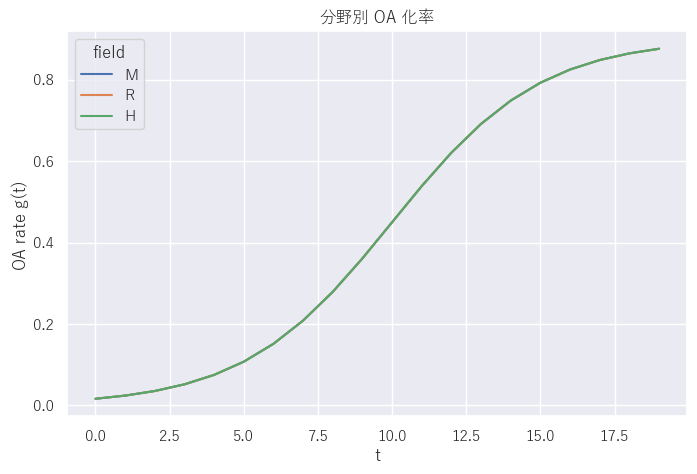

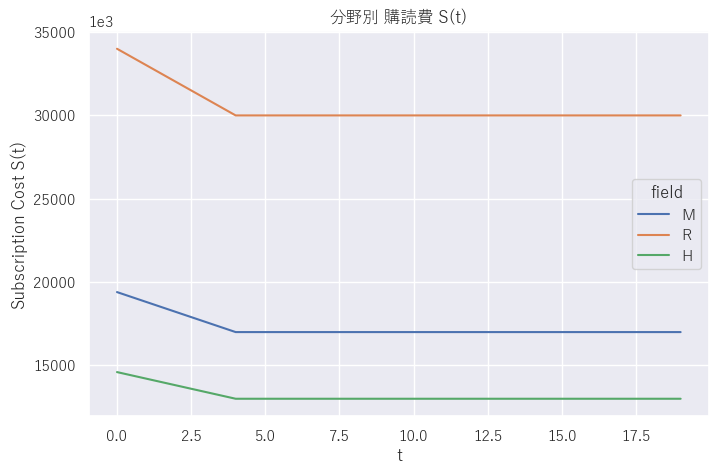

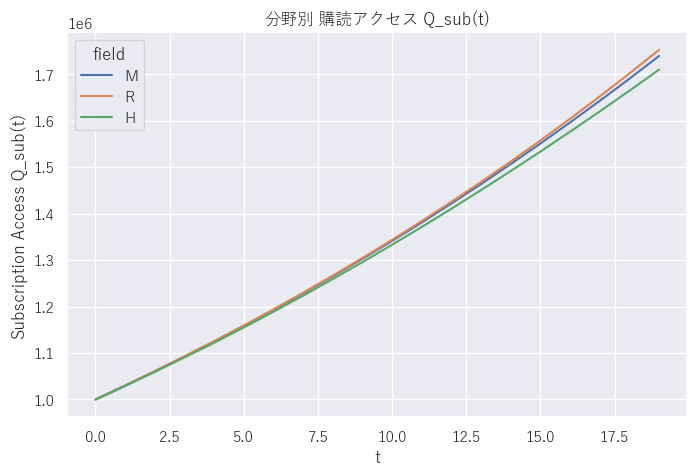

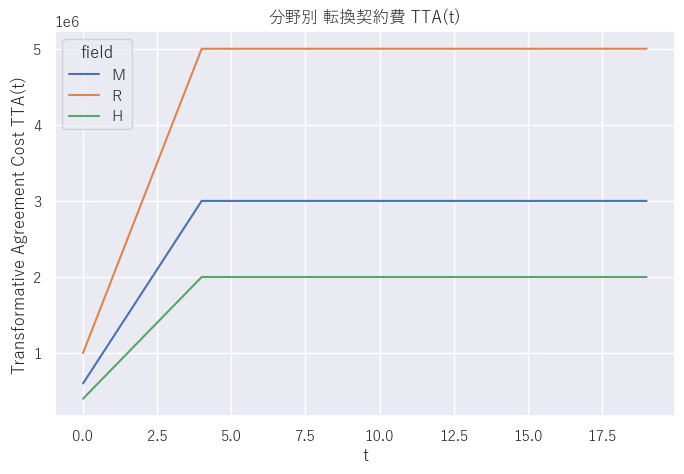

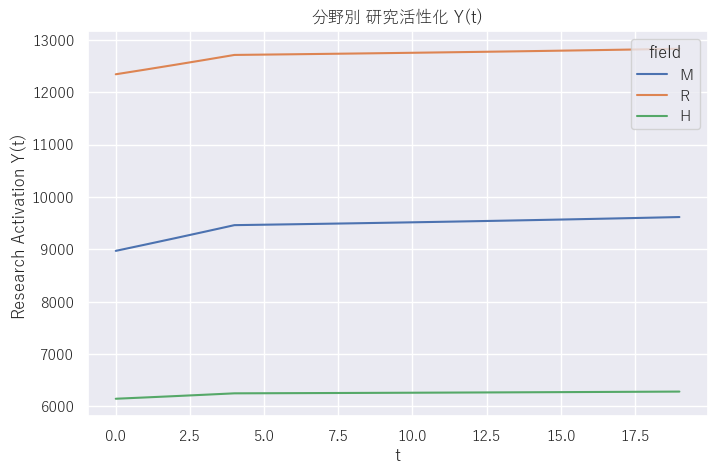

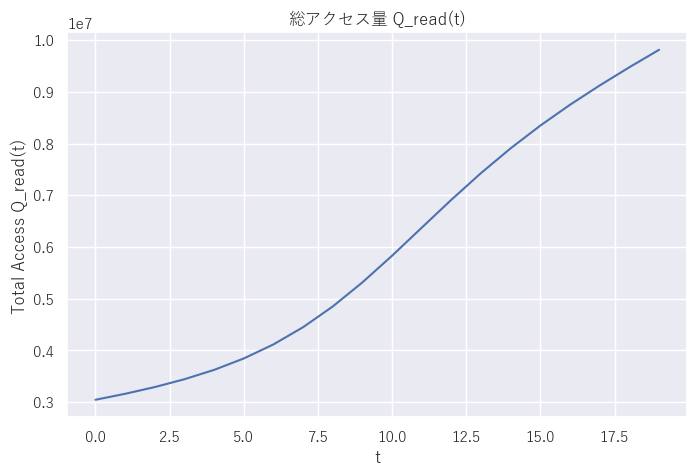

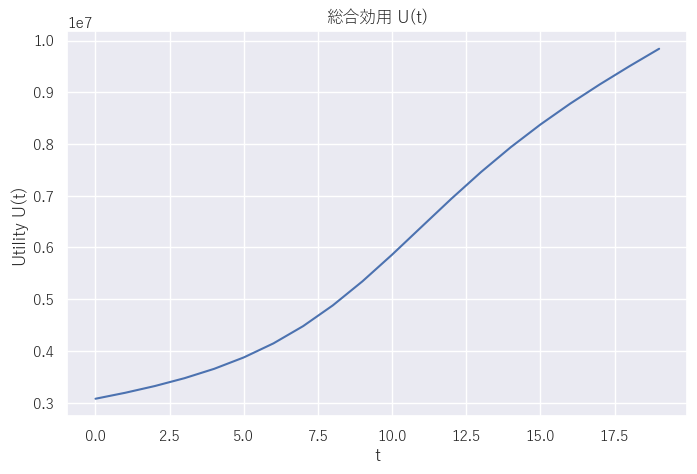

In [6]:
# 可視化
# print(plt.rcParams['font.family'])
plot_dfv7(df_fields, df_total)


<Figure size 1000x600 with 0 Axes>

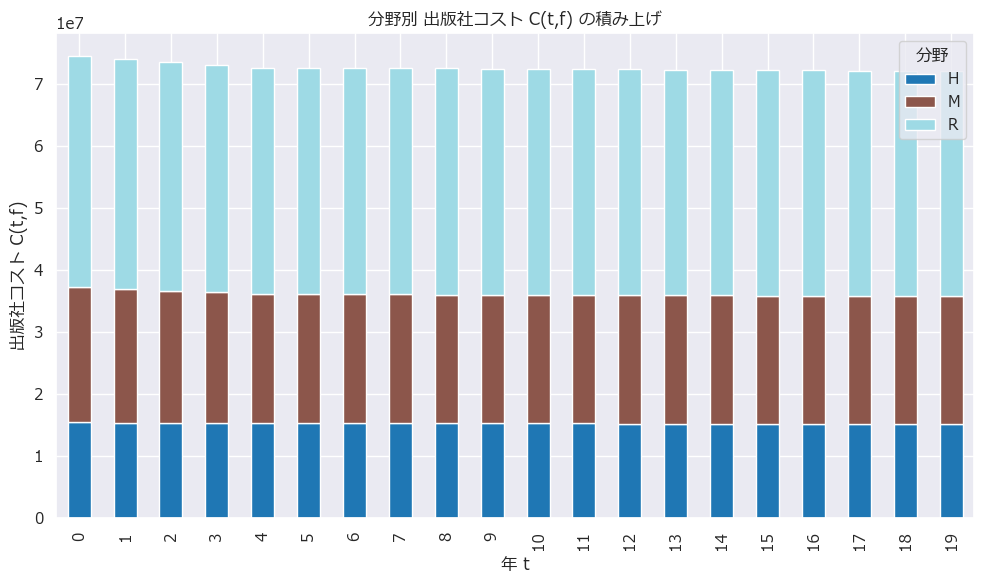

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

def plot_publisher_cost_stacked(df_fields):
    """
    df_v7 の出版社コスト C_{t,f} を
    分野別に積み上げて可視化する関数
    """

    # 日本語フォント設定（Windows）
    matplotlib.rcParams['font.family'] = 'Meiryo'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # pivot して t × field の表に変換
    df_pivot = df_fields.pivot(index="t", columns="field", values="C")

    # 積み上げ棒グラフ
    plt.figure(figsize=(10,6))
    df_pivot.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

    plt.title("分野別 出版社コスト C(t,f) の積み上げ")
    plt.xlabel("年 t")
    plt.ylabel("出版社コスト C(t,f)")
    plt.legend(title="分野")
    plt.tight_layout()
    plt.show()

# 出版社コストの積み上げ可視化
plot_publisher_cost_stacked(df_fields)


<Figure size 1000x600 with 0 Axes>

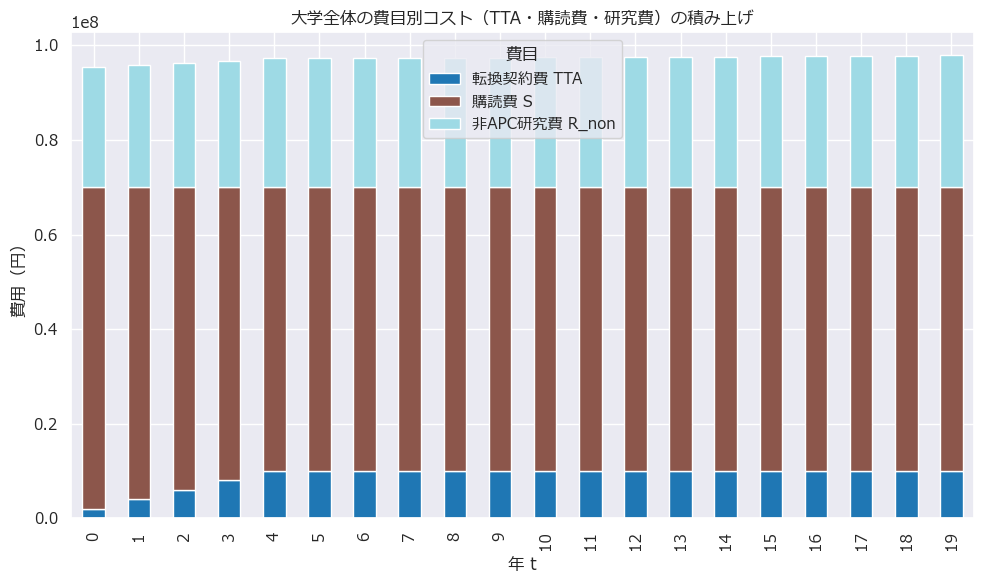

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

def plot_cost_components_stacked(df_fields):
    """
    df_v7 の費目別（TTA, S, R_non）を
    大学全体として積み上げて可視化する関数
    """

    # 日本語フォント設定（Windows）
    matplotlib.rcParams['font.family'] = 'Meiryo'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # -----------------------------
    # 年度ごとに費目を合計
    # -----------------------------
    df_sum = df_fields.groupby("t")[["TTA", "S", "R_non"]].sum()

    # -----------------------------
    # 積み上げ棒グラフ
    # -----------------------------
    plt.figure(figsize=(10,6))
    df_sum.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

    plt.title("大学全体の費目別コスト（TTA・購読費・研究費）の積み上げ")
    plt.xlabel("年 t")
    plt.ylabel("費用（円）")
    plt.legend(title="費目", labels=["転換契約費 TTA", "購読費 S", "非APC研究費 R_non"])
    plt.tight_layout()
    plt.show()
# 費目別コストの積み上げ可視化
plot_cost_components_stacked(df_fields)

<Figure size 1000x600 with 0 Axes>

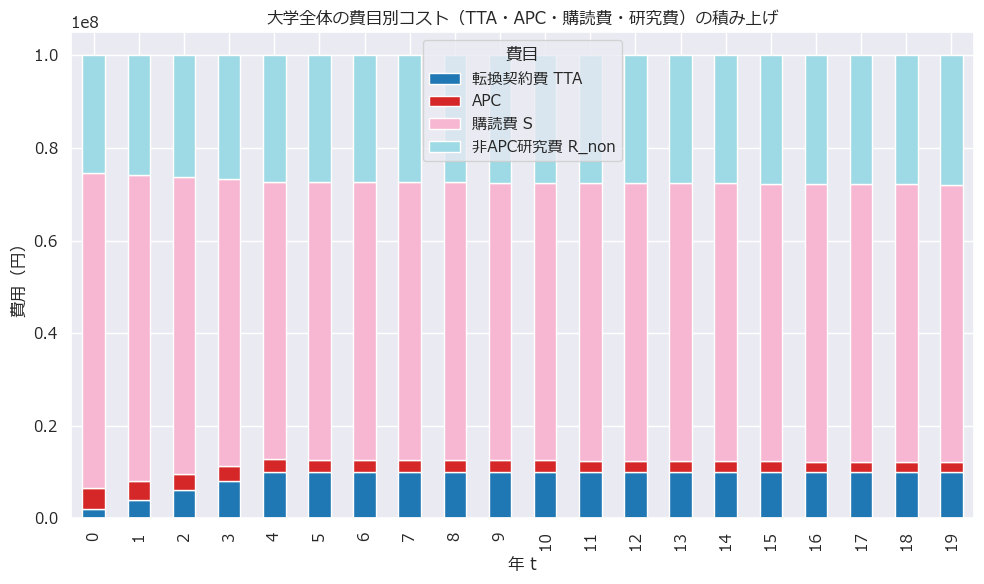

In [15]:
# 費目別コストの積み上げ可視化
plot_cost_components_stacked(df_fields)

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

def plot_cost_components_stacked(df_fields):
    """
    df_v7/df_v8 の費目別（TTA, APC, S, R_non）を
    大学全体として積み上げて可視化する関数
    """

    # 日本語フォント設定（Windows）
    matplotlib.rcParams['font.family'] = 'Meiryo'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # -----------------------------
    # 年度ごとに費目を合計
    # -----------------------------
    df_sum = df_fields.groupby("t")[["TTA", "A", "S", "R_non"]].sum()

    # -----------------------------
    # 積み上げ棒グラフ
    # -----------------------------
    plt.figure(figsize=(10,6))
    df_sum.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

    plt.title("大学全体の費目別コスト（TTA・APC・購読費・研究費）の積み上げ")
    plt.xlabel("年 t")
    plt.ylabel("費用（円）")
    plt.legend(title="費目", labels=["転換契約費 TTA", "APC", "購読費 S", "非APC研究費 R_non"])
    plt.tight_layout()
    plt.show()

In [9]:
import numpy as np

def simulate_df_v8(
    T=20,
    fields=["M", "R", "H"],
    B=None,
    R_total=None,
    A_base=None,
    beta0=None,
    phi=0.8,
    P0=None,
    rho=None,
    g_inf=None,
    gamma=None,
    t0=None,
    u_min=0.02,
    u_max=0.10,
    T0=5,
    eta=None,
    gamma_R=0.5,
    N=None,
    kappa=None,
    w1=1.0,
    w2=1.0,
    apc_inflation=0.03,
    subs_inflation=0.03
):
    """
    df_v8: APC と購読費のインフレを組み込んだ拡張版
    """

    if B is None:
        B = {"M": 30e6, "R": 50e6, "H": 20e6}

    if R_total is None:
        R_total = {"M": 10e6, "R": 15e6, "H": 5e6}

    if A_base is None:
        A_base = {"M": 2e6, "R": 2.5e6, "H": 0.5e6}

    if beta0 is None:
        beta0 = {"M": 0.20, "R": 0.10, "H": 0.05}

    if P0 is None:
        P0 = {"M": 1_000_000, "R": 1_000_000, "H": 1_000_000}

    if rho is None:
        rho = {"M": 0.03, "R": 0.03, "H": 0.03}

    if g_inf is None:
        g_inf = {"M": 0.9, "R": 0.9, "H": 0.9}

    if gamma is None:
        gamma = {"M": 0.4, "R": 0.4, "H": 0.4}

    if t0 is None:
        t0 = {"M": 10, "R": 10, "H": 10}

    if eta is None:
        eta = {"M": 1.0, "R": 1.0, "H": 1.0}

    if N is None:
        N = {"M": 300, "R": 500, "H": 200}

    if kappa is None:
        kappa = {"M": 0.5, "R": 0.5, "H": 0.5}

    P = {f: np.zeros(T) for f in fields}
    g = {f: np.zeros(T) for f in fields}
    u = {f: np.zeros(T) for f in fields}
    TTA = {f: np.zeros(T) for f in fields}
    beta_tf = {f: np.zeros(T) for f in fields}
    A = {f: np.zeros(T) for f in fields}
    R_non = {f: np.zeros(T) for f in fields}
    S = {f: np.zeros(T) for f in fields}
    C = {f: np.zeros(T) for f in fields}
    Y = {f: np.zeros(T) for f in fields}
    Q_sub = {f: np.zeros(T) for f in fields}

    Q_read = np.zeros(T)
    Y_total = np.zeros(T)
    U = np.zeros(T)

    for f in fields:
        P[f][0] = P0[f]

    for t in range(T):

        for f in fields:

            if t > 0:
                P[f][t] = P[f][t-1] * (1 + rho[f])

            g[f][t] = g_inf[f] / (1 + np.exp(-gamma[f] * (t - t0[f])))

            if t < T0:
                u[f][t] = u_min + (u_max - u_min) * (t / (T0 - 1))
            else:
                u[f][t] = u_max

            TTA[f][t] = u[f][t] * B[f]

            beta_tf[f][t] = beta0[f] * (1 + phi * (P[f][t] / P0[f]))

            A_base_t = A_base[f] * (1 + apc_inflation) ** t

            A[f][t] = max(0, A_base_t - beta_tf[f][t] * TTA[f][t])

            R_non[f][t] = max(0, R_total[f] - A[f][t])

            S_raw = B[f] - TTA[f][t] - A[f][t] - R_non[f][t]

            S[f][t] = max(0, S_raw * (1 + subs_inflation) ** t)

            C[f][t] = A[f][t] + TTA[f][t] + S[f][t]

            Y[f][t] = eta[f] * (R_non[f][t] ** gamma_R) * (N[f] ** 0.2)

            Q_sub[f][t] = P[f][t] * (1 - np.exp(-kappa[f] * S[f][t] / P[f][t]))

        Q_read[t] = sum(P[f][t] * g[f][t] + Q_sub[f][t] for f in fields)
        Y_total[t] = sum(Y[f][t] for f in fields)
        U[t] = w1 * Q_read[t] + w2 * Y_total[t]

    return {
        "P": P,
        "g": g,
        "u": u,
        "TTA": TTA,
        "beta_tf": beta_tf,
        "A": A,
        "R_non": R_non,
        "S": S,
        "C": C,
        "Y": Y,
        "Q_sub": Q_sub,
        "Q_read": Q_read,
        "Y_total": Y_total,
        "U": U
    }

In [10]:
# df_v8 を実行
result = simulate_df_v8(T=20)

# pandas DataFrame に変換
df_v8_fields, df_v8_total = dfv7_to_dataframe(result)

print(df_v8_fields.head())
print(df_v8_total.head())

   t field           P         g     u        TTA   beta_tf             A  \
0  0     M  1000000.00  0.016188  0.02   600000.0  0.360000  1.784000e+06   
1  1     M  1030000.00  0.023937  0.04  1200000.0  0.364800  1.622240e+06   
2  2     M  1060900.00  0.035249  0.06  1800000.0  0.369744  1.456261e+06   
3  3     M  1092727.00  0.051592  0.08  2400000.0  0.374836  1.285847e+06   
4  4     M  1125508.81  0.074855  0.10  3000000.0  0.380081  1.110773e+06   

          R_non            S             C            Y         Q_sub  
0  8.216000e+06  19400000.00  2.178400e+07  8969.215654  9.999387e+05  
1  8.377760e+06  19364000.00  2.218624e+07  9057.080095  1.029915e+06  
2  8.543739e+06  19308380.00  2.256464e+07  9146.358973  1.060782e+06  
3  8.714153e+06  19231995.20  2.291784e+07  9237.125529  1.092562e+06  
4  8.889227e+06  19133649.77  2.324442e+07  9329.454259  1.125280e+06  
   t        Q_read       Y_total             U
0  0  3.047826e+06  27455.600704  3.075282e+06
1  1  3.163

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick   # ライブラリをインポートする。
import seaborn as sns

def plot_dfv8(df_v8_fields, df_v8_total):
    """
    df_v8 の結果を seaborn で可視化するモジュール
    1. 分野別 OA 化率
    2. 分野別 購読費
    3. 分野別 購読アクセス
    4. 分野別 転換契約費
    5. 分野別 研究活性化
    6. 総アクセス
    7. 総合効用
    """
    # -----------------------------
    # 日本語フォント設定（Windows）
    # -----------------------------
    sns.set(font='Yu Gothic')
    
    # 目盛りの指数表記を無効化
    # -----------------------------
    # 1. 分野別 OA 化率
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_fields, x="t", y="g", hue="field")
    plt.title("分野別 OA 化率")
    plt.ylabel("OA rate g(t)")
    plt.show()

    # -----------------------------
    # 2. 分野別 購読費 S
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_fields, x="t", y="S", hue="field")
    plt.title("分野別 購読費 S(t)")
    plt.ylabel("Subscription Cost S(t)")
    # plt.ticklabel_format(style='plain')
    # plt.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
    plt.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3（10の3乗）単位にする。
    plt.show()

    # -----------------------------
    # 3. 分野別 購読アクセス Q_sub
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_fields, x="t", y="Q_sub", hue="field")
    plt.title("分野別 購読アクセス Q_sub(t)")
    plt.ylabel("Subscription Access Q_sub(t)")
    plt.show()

    # -----------------------------
    # 4. 分野別 転換契約費 TTA
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_fields, x="t", y="TTA", hue="field")
    plt.title("分野別 転換契約費 TTA(t)")
    plt.ylabel("Transformative Agreement Cost TTA(t)")
    plt.show()

    # -----------------------------
    # 5. 分野別 研究活性化 Y
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_fields, x="t", y="Y", hue="field")
    plt.title("分野別 研究活性化 Y(t)")
    plt.ylabel("Research Activation Y(t)")
    plt.show()

    # -----------------------------
    # 6. 総アクセス Q_read
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_total, x="t", y="Q_read")
    plt.title("総アクセス量 Q_read(t)")
    plt.ylabel("Total Access Q_read(t)")
    plt.show()

    # -----------------------------
    # 7. 総合効用 U
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_v8_total, x="t", y="U")
    plt.title("総合効用 U(t)")
    plt.ylabel("Utility U(t)")
    plt.show()

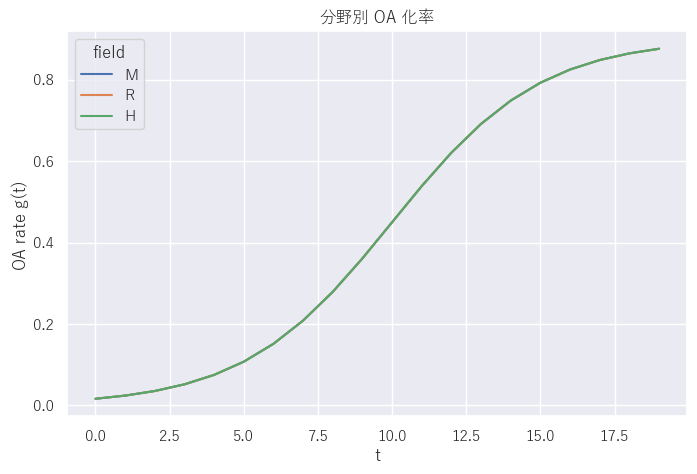

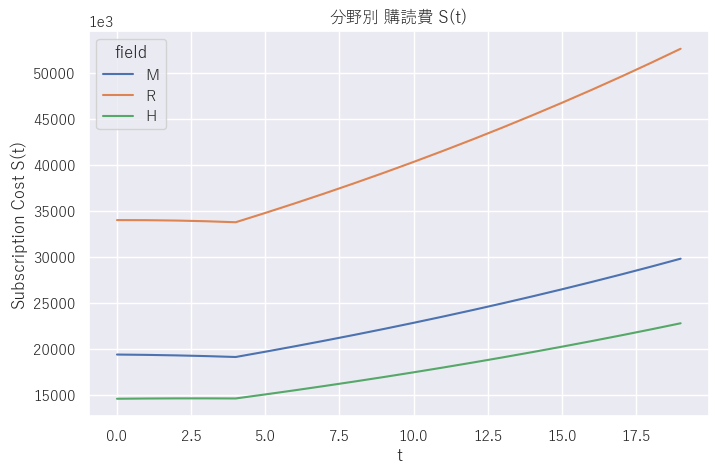

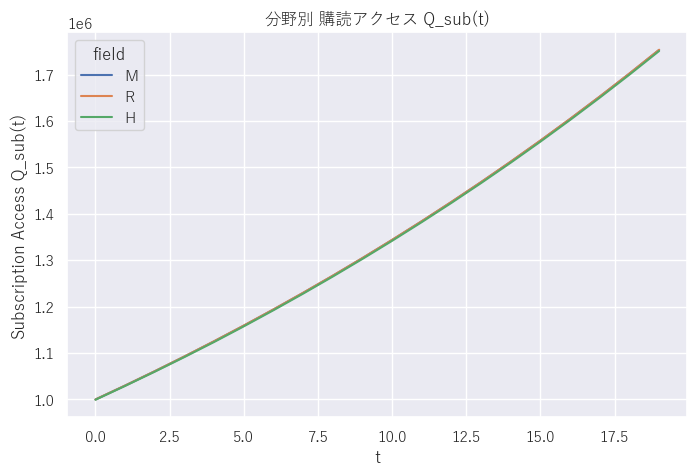

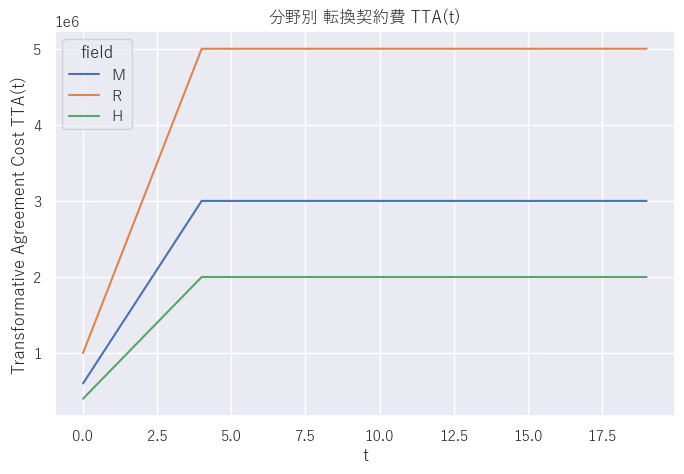

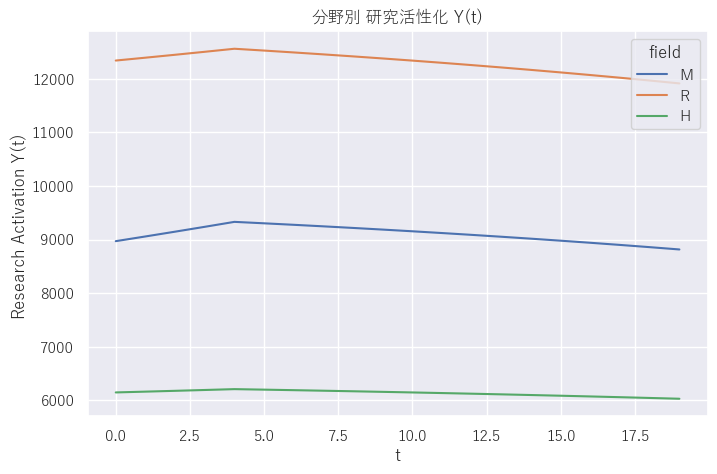

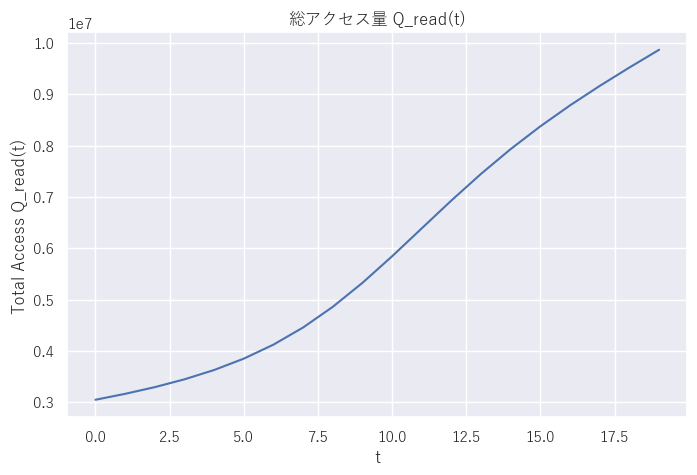

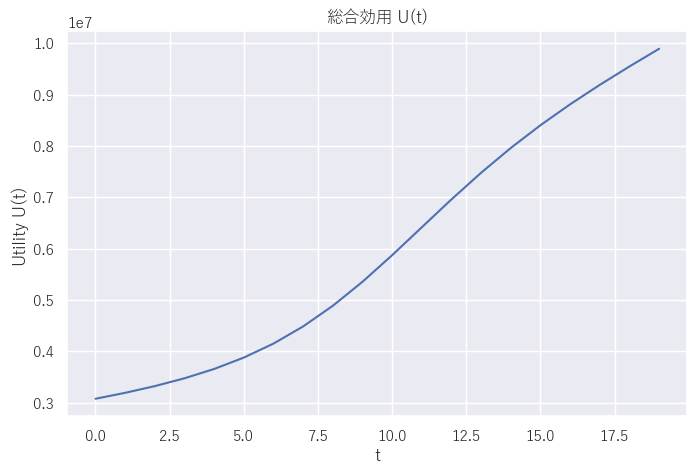

In [12]:
# 可視化
# print(plt.rcParams['font.family'])
plot_dfv8(df_v8_fields, df_v8_total)


<Figure size 1000x600 with 0 Axes>

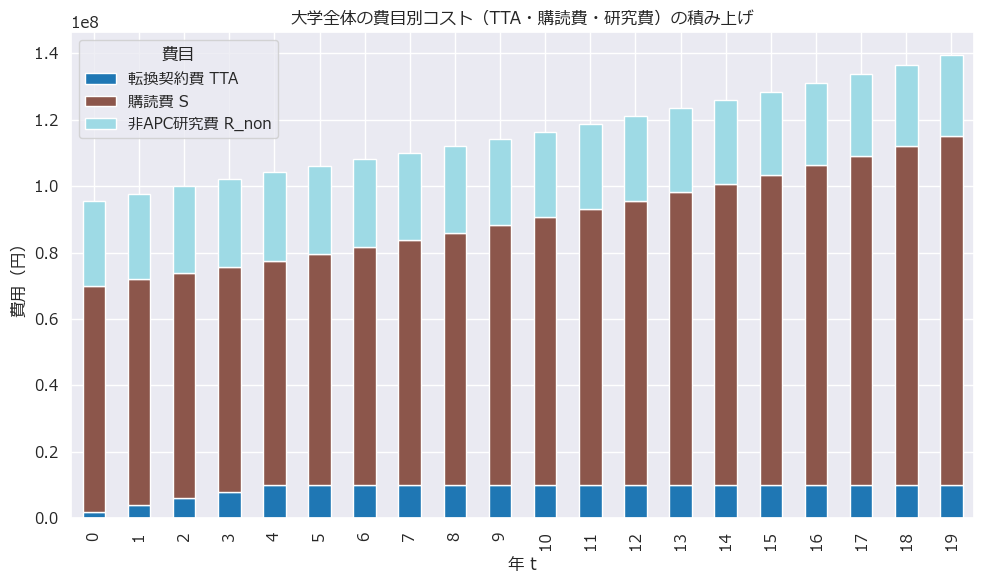

In [13]:
# 費目別コストの積み上げ可視化
plot_cost_components_stacked(df_v8_fields)

<Figure size 1000x600 with 0 Axes>

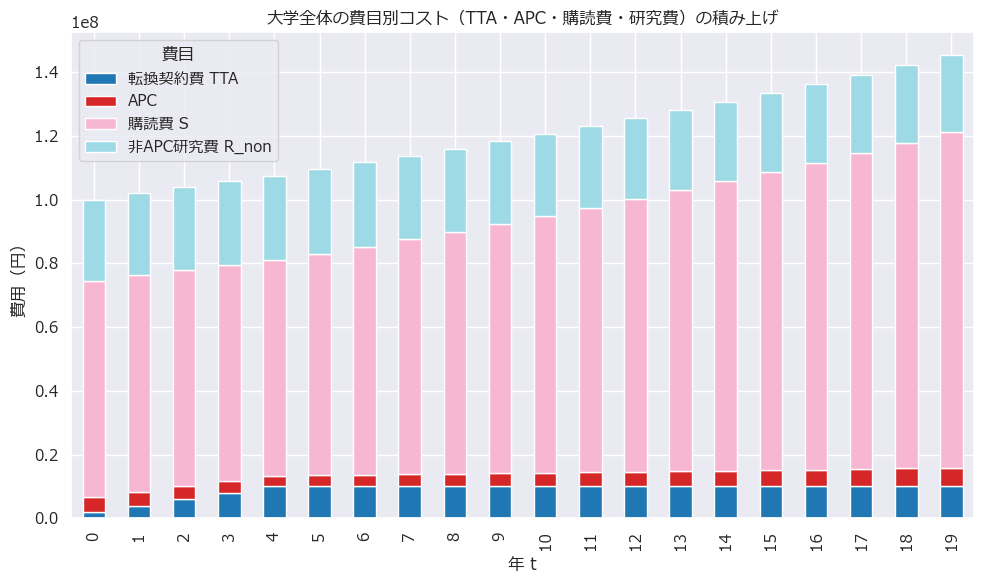

In [16]:
# 費目別コストの積み上げ可視化
plot_cost_components_stacked(df_v8_fields)